# The matplotlib.pyplot Package - Author: Andrew Scott

This notebook will take a look at the matplotlib.pyplot package for Python, which is used for creating plots and data visulisations. This notebook will contain Python code and its outputs, as well as text that expands upon the code. Wherever code requires a reference, a link to the reference will be provided in the code comments. References in the text will be numbered and a reference section at the end of this notebook will provide further information about the source. 

# Table of Contents
* [**Matplotlib**](#h1)   
* [**matplotlib.pyplot**](#h2)
* [**Scatterplot**](#h3)
* [**Histogram**](#h4)   
* [**Barplot**](#h5)
* [**References**](#h6)

## Matplotlib<a id='h1'></a>

An important element of data analysis is to produce plots that can quickly, clearly, and accurately convey information about a dataset. Matplotlib is a Python library made to create plots/data visualisations[<sup>1</sup>](#f1).<a id='a1'></a>. The package was created by John D. Hunter, who wanted to replicate the data visualisations of the programming language MATLAB within Python[<sup>2</sup>](#f2)<a id='a2'></a>, and it has become popular due to its ease of use, continuous upkeep by a team of developers, and its support for various outputs and backends which ensures that it's likely to work across operating systems[<sup>3</sup>](#f3)<a id='a3'></a>. The image below displays the elements of a plot created with Matplotlib[<sup>4</sup>](#f4)<a id='a4'></a>. Each of these elements can be created and altered by the user using the various methods available, which can be seen on the Matplotlib documentation page[<sup>5</sup>](#f5)<a id='a5'></a>. A number of these methods will be used throughout this notebook. 

<img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001_2_0x.png" alt="drawing" width="600"/>

Matplotlib can be used in either an object-oriented or a stateful manner[<sup>6</sup>](#f6)<a id='a6'></a>. When used in an object-oriented manner, each element of the plot is specified individually by the user. This offers the user more control over the output of the plot but is more complex to code. 

Alternatively, the user can use a stateful approach, which is more similar to MATLAB. In the stateful approach, the matplotlib package pylot keeps track of the current figure and adds elements to it based on the code passed to it. If no current figure exists, pyplot will create a figure for the user. This results in plots that are easier and faster to create than with the object-oriented approach. This notebook will mostly deal with the latter approach. While using pyplot might offer less control than with the object-oriented approach, the elements present in the diagram above can all be altered and controlled using pyplot. Examples of this will be shown throughout this notebook.

## matplotlib.pyplot<a id='h2'></a>

To use matplotlib.pyplot, it first needs to be imported. It is conventionally imported as plt, which means that henceforth in the code pyplot can be called by typing plt, instead of repeatedly having to type out matplotlib.pyplot each time. Two other packages will also be imported - Numpy, which is used for fast calculations with numerical arrays, and pandas, which is used to create and manipulate dataframes within python. These packages will be used to create and load numerical data that can be plotted with pyplot. A magic command is also included, the purpose of which is to allow for plots to be displayed within notebooks after the code is executed. 

In [1]:
# Plotting: https://matplotlib.org/
import matplotlib.pyplot as plt

# Numerical arrays: https://numpy.org/
import numpy as np

# Dataframes: https://pandas.pydata.org/
import pandas as pd

# Matplotlib magic command: https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline

As well as using some manually thrown together data to use for plotting, a real life dataset is also being loaded and will also be used in plots. This dataset the 10 highest paid Athletes every year between 1990 and 2020, as reported by Forbes. The scv of this dataset was acquired from the following reference[<sup>7</sup>](#f7)<a id='a7'></a>.               

Data was manually cleaned at parts so the sport names would be more consistent. The same sport was sometimes given a different name for different years. Below is a list of the changes made manually.    
   - The sport for F1 drivers was inconsistently named - manually changed all to "F1 Racing".      
       - In the original file, the name changed between "Auto Racing", "F1 Motorsports", and "F1 Racing".     
   - Nascar inconsistently named - manually changed all to "Nascar".     
       - In the original file, changed between "Auto Racing", "Auto Racing (Nascar)", and "Nascar".     
   - Changed three instances of "NFL" to "American Football".         
   - Changed one instance of "NBA" to "Basketball".                
   - Changed one instance of "Hockey" to "Ice Hockey".                   

In [2]:
# Load Forbes dataset 
df = pd.read_csv('pyplot/pyplot-inputs/forbes.csv', header=[0])

Below, we will look at three varieties of plots that can be created with pyplot - scatterplot, histogram, and barplot.

## Scatterplot<a id='h3'></a>[<sup>8</sup>](#f8)<a id='a8'></a>

A scatterplot is used to plot the value for two variables, which can be used to identify any possible relationship between the two variables[<sup>9</sup>](#f9)<a id='a9'></a>. 

In [3]:
# A list of variables to be plotted
a = [1, 2, 3, 4, 5]
b = [1, 5, 7, 15, 22]

A simple scatterplot can be created by using plt.plot. By default, plt.plot returns a line plot, but adding 'o' changes the marker type, transforming the plot to a scatterplot. Pyplot deals with elements such as the creation of a figure and axis ticks meaning all we have to provide for a simple plot is the variables to be plotted, and whether to pass them as a variable for the x-axis or the y-axis. 

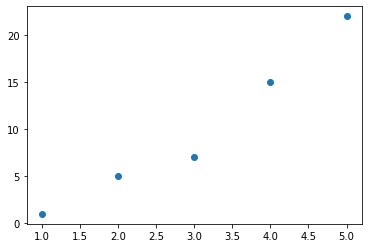

In [4]:
# A simple scatterplot of two lists of integers
plt.plot(a, b, 'o')

Our simple scatterplot shows us that as the value for the x-axis increases, so does the value for the y-axis, which shows that the two values are positively correlated. 

The default art style for pyplot visually rather uninteresting. This can be a benefit, meaning the information is presented in as straightforward a manner as possible. However, we can also change the plot style to make the default plot outputs look different. In the below example, the plot style is changed to 'ggplot', which is based on the data visualisation package for the R programming language. This changes the background colour, border style, and adds a grid. Other style examples can be previewed at this reference[<sup>10</sup>](#f10)<a id='a10'></a>.

We can also change the size of the plot in our notebook. As the default plots are rather small, we can change the size using plt.rcParams to increase the output plot size. The benefit of the increased plot size will be more evident when displaying plots with more data points.

In [5]:
# Change the style of plots.
plt.style.use('ggplot')

# Change the default size of plots
plt.rcParams["figure.figsize"] = (14, 8)

While we can use plt.plot to create scatterplots, pyplot comes with a function specifically for scatterplots. Using plt.scatter becomes prefered when creating busier plots as it allows for greater control and editing of the output.

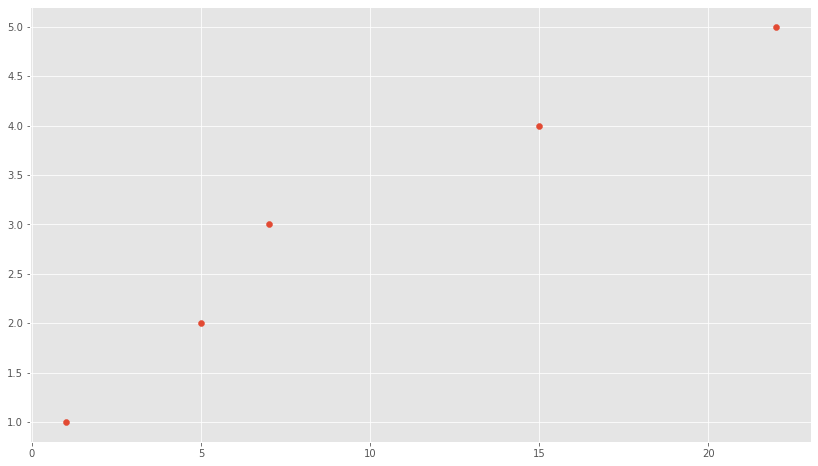

In [6]:
# The same simple scatterplot using plt.scatter, with axes swapped
plt.scatter(b, a)

While pyplot will take care of elements such as the axis ticks by default, to make the plot easier to read we can alter the figure by providing elements such as a title and axis labels. We can also alter existing elements such as the grid provided by the ggplot theme. Below, both the line colour and line type for the grid have been altered. 

Furthermore, additional variables can be conveyed on a scatterpoint by changing the size and/or colour of the points. In the below example, the ranking for each year is indicated by colour, with the tenth position each year the lightest and the points get darker for each rank up to black for 1st. Additionally, the y-axis variable values are emphasised by the increasing size of the points, with larger points indicating higher earnings.

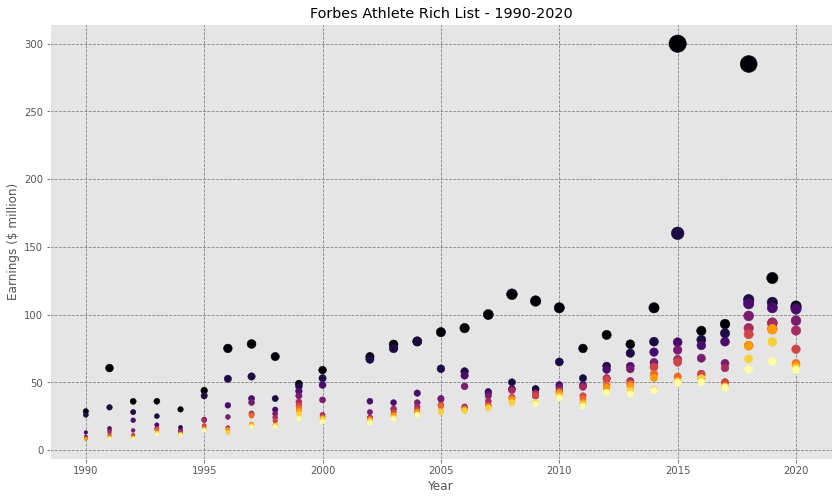

In [7]:
# A plot using Forbes dataframe
# Using "s=df["earnings ($ million)"]" changes the size of the points based on that variables' value
# Using "c=df["Current Rank"]" changes that colour of the plot point, in this instance based on ranking
plt.scatter(x=df["Year"], y=df["earnings ($ million)"], 
            s=df["earnings ($ million)"],c=df["Current Rank"], marker='o', 
           cmap = 'inferno')

# Adding titles and labels to plot
plt.title("Forbes Athlete Rich List - 1990-2020")
plt.xlabel("Year")
plt.ylabel("Earnings ($ million)")
plt.grid(True, color='gray', linestyle = "--")

# Save the output plot
plt.savefig('pyplot/pyplot-outputs/ForbesRichScatter.png')

We can see on the plot that there are only two entries above \\$200m, which are probably worth further exploration. We can now look at the dataframe and filter it to only show entries above \\$200m, which shows that Floyd Mayweather has twice earned totals that no other athlete has come close to matching.

In [8]:
# View earnings higher than 200 million
df[df['earnings ($ million)'] >= 200]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,242,Floyd Mayweather,USA,1,1,Boxing,2015,300.0
271,272,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0


## Histogram<a id='h4'></a>[<sup>11</sup>](#f11)<a id='a11'></a>

A histogram is used to view the distribution of numerical data. The data is categorised into bars called bins or buckets that specify a range. The height of the bar indicates how many values fall into the range that each bin covers. We can use numpy's random module to generate a range of data that can be plotted on a histogram by providing a mean, which is the average value, and a standard deviation, which dictates the spread or how wide the range of the values are. This data can then be plotted using the plt.hist() method.

In [9]:
# Importing the numpy random number generator as per numpy documentation recommendation
from numpy.random import default_rng
rng = default_rng()

In [10]:
# Defining the mean and standard deviation that will be used by the rng
mu, sigma = 20000, 100

# Using numpy random to generate 1000 instances of normally distributed data
random = np.random.default_rng().normal(mu, sigma, 1000)

As well as plotting the histogram, we can add text to the plot. This can be useful for our histogram as we can show the mean and standard deviation.

Text(20200, 225, '$\\mu=20000,\\ \\sigma=100$')

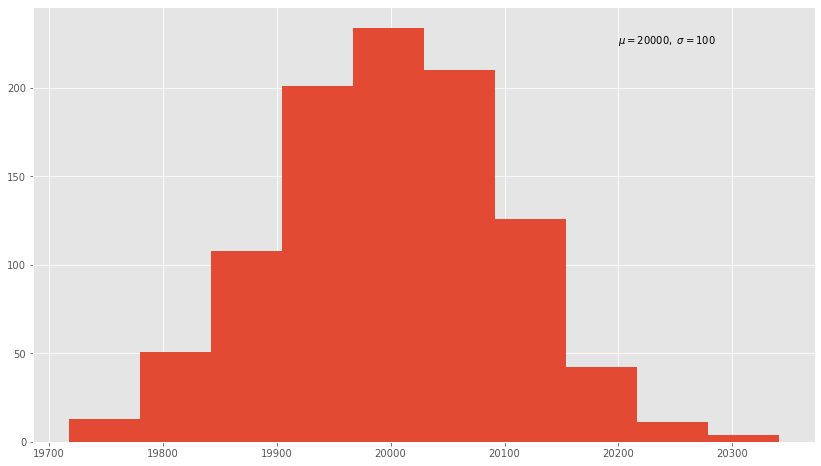

In [11]:
# Plotting the randomly generated data to view the distribution
plt.hist(random)

# Add text to plot showing mu and sigma
plt.text(20200, 225, r'$\mu=20000,\ \sigma=100$')

This plot shows a normal distribution, which is one of the most common distribution types, typified by the bell-shape of the distribution. In it, we can see that more values fall into the bin around the 20000 mark, and values decrease further as we move in either direction from the mean, until we get to the least common values at both extremes of the distribution.

We can also edit the ticks of the plot if needed. In the example below, the vast majority of values lie to the left of the plot, with a few outliers dragging the histogram to the right. As such, it feels appropriate to have more ticks to the left of the plot to provide more information about these values. We can also edit the plot to make it more transparent, which is useful for a histogram to aid with seeing the grid in the background, making values easier to read from the x-axis and y-axis.

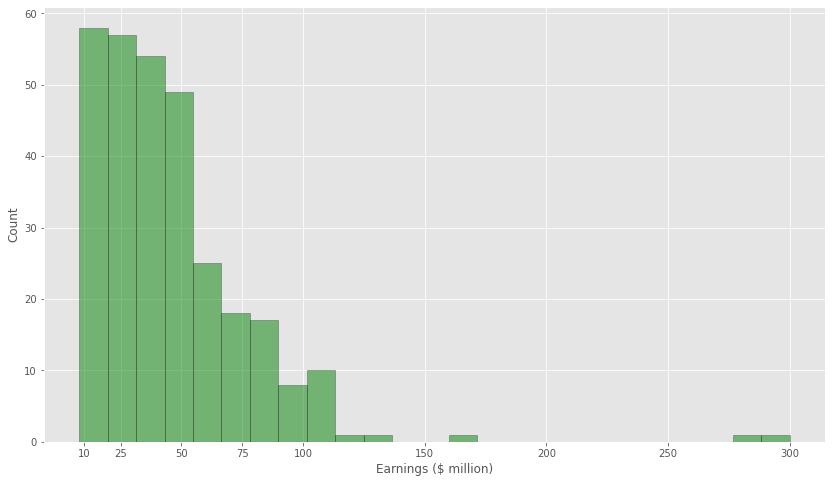

In [12]:
# Distribution of the earnings in the Forbes dataframe
# Set alpha to make plot transparant to more easily see grid
plt.hist(df["earnings ($ million)"], bins = 25, color='g', 
         alpha=0.5, edgecolor='black')
plt.xlabel("Earnings ($ million)")
plt.ylabel("Count")

# Giving the plot unique ticks on the x-axis so there are more markers where the plot has more datapoints
x_ticks = [10, 25, 50, 75, 100, 150, 200, 250, 300]

#add x-axis values to plot
plt.xticks(ticks=x_ticks)
# Save the output plot
plt.savefig('pyplot/pyplot-outputs/ForbesRichHist.png')

It's notable from this histogram that there are sudden drops around \\$50 million and \\$100 million, suggesting there is probably a hesitancy to pay the athletes above such round numbers as \\$50 million and \\$100 million.

## Barplot<a id='h5'></a>[<sup>12</sup>](#f12)<a id='a12'></a>

While at first glance a barplot and a histogram might look similar, they are in fact different and it's important to specify the differences between them, with pyplot having separate methods for a histogram and a barplot. While both show bars representing values, a histogram shows a range for a specific variable, while a barplot shows the frequency of categorical variables[<sup>13</sup>](#f13)<a id='a13'></a>. This is best demonstrated with a concrete example. Below is a plot of different categories of fruit, with the bar showing the amount of each fruit.

In [13]:
# Example Data
amount = [9, 4, 8, 3, 7]
fruit = ["apple", "pear", "orange", "avocado", "banana"]

<BarContainer object of 5 artists>

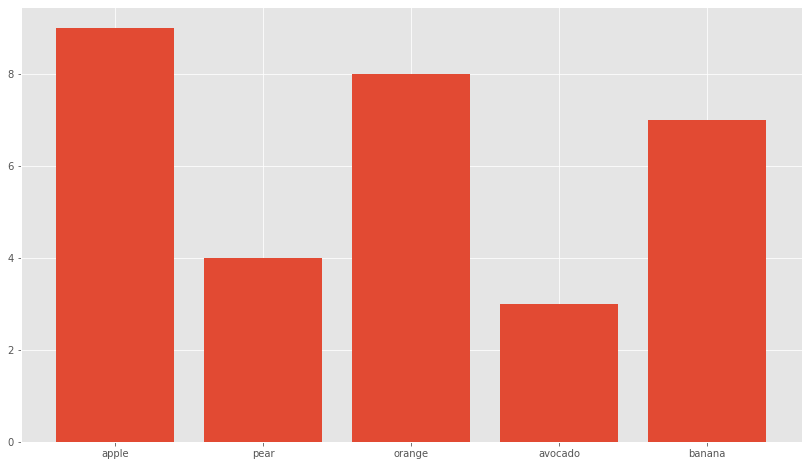

In [14]:
# Plotting the example data in a bar chart
plt.bar(fruit, amount)

The plot can also be edited by giving each bar a different colour to make the plot more visually appealing. By default, pyplot also set the y-axis ticks to increase by two, so the axis can be changed to increase by one to make the value for each bar easier to read.

([<matplotlib.axis.YTick at 0x25500de6f10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

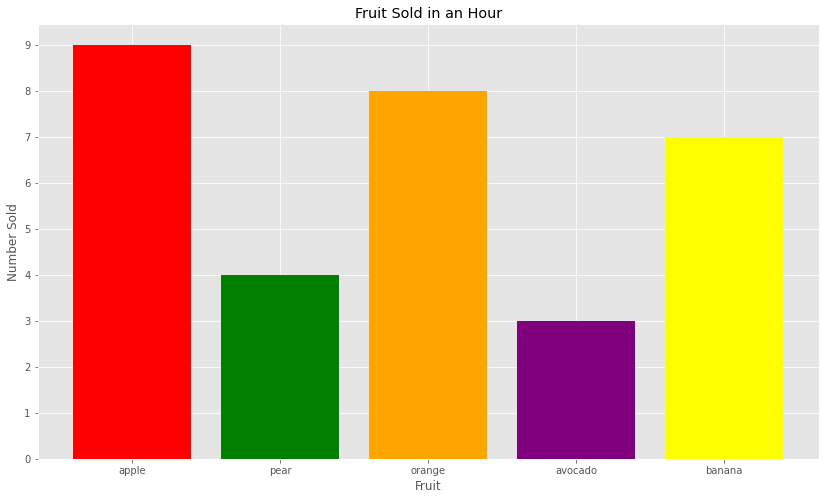

In [15]:
# Change the bar colours and add axis labels
plt.bar(fruit, amount, 
       color=['red', 'green', 'orange', 'purple', 'yellow'])
plt.title("Fruit Sold in an Hour")
plt.xlabel("Fruit")
plt.ylabel("Number Sold")

# Set y-axis ticks to increase by 1 rather than 2
plt.yticks(ticks=np.arange(10))

A barplot can also reveal some interesting details with the Forbes dataset since there are a number of categorical values, most notable the sport column. We can edit our dataframe to make it easier to plot by first editing the case of the values in the sports column, as otherwise, pyplot will incorrectly consider the same sport entered in different cases as different sports. 

In [16]:
# The data in the sports colums was entered in both title case and lower case
# Changed all to title to make the count easier
df.Sport = df.Sport.str.title()
df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,Boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,Boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,Boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,F1 Racing,1990,10.0
4,5,Alain Prost,France,5,NaN,F1 Racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


We can now create a new dataframe that provides information based on the sports column, which tells us how often that sport appears and how much is earned by the participants in each sport.

In [17]:
# Create a new df that groups sport by apperances in list and total sport earnings
df_sport = df.groupby('Sport').count()[['Year']]
df_sport['Total Earnings ($ million)'] = df.groupby('Sport').sum()['earnings ($ million)']
df_sport = df_sport.rename(columns={'Year':'Count'})
df_sport.reset_index(level=0, inplace=True)
df_sport

,Sport,Count,Total Earnings ($ million)
0,American Football,20,938.7
1,American Football / Baseball,1,22.5
2,Baseball,6,146.1
3,Basketball,82,3433.3
4,Boxing,46,2298.8
5,Cycling,1,28.0
6,F1 Racing,30,1004.8
7,Golf,44,2136.5
8,Ice Hockey,4,75.7
9,Mma,1,99.0


Rather than specifying a colour for every bar, we can convert an existing colourmap and apply it to the barplot as demonstrated below.

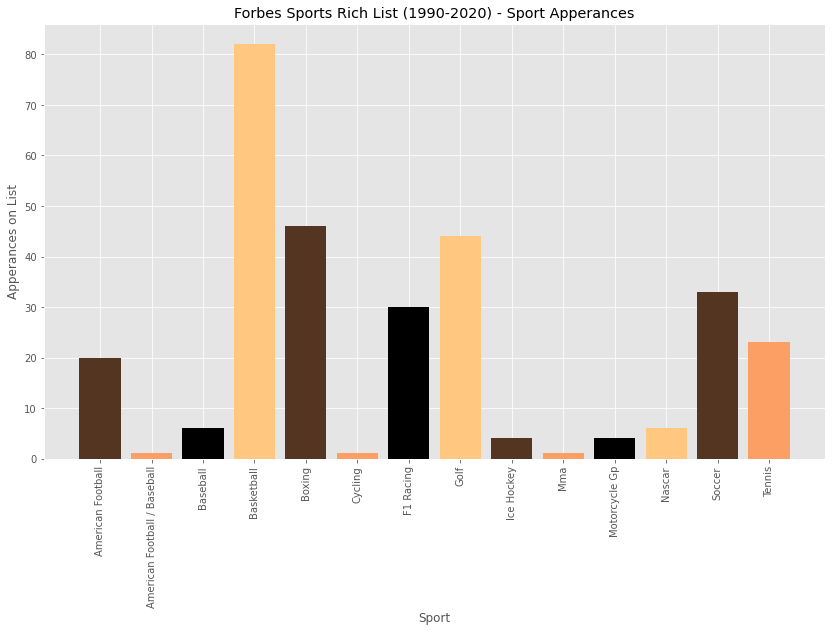

In [18]:
# Convert cmap to colors for barchart
# https://moonbooks.org/Articles/How-to-plot-a-bar-chart-with-a-colorbar-using-matplotlib-in-python-/
data_color = [200.,600.,0.,750.]
data_color_normalized = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('copper')
colors = my_cmap(data_color_normalized)

# Plot Forbes Rich List by sport count
plt.bar(df_sport['Sport'], df_sport['Count'], color=colors)

# Add labels
plt.title("Forbes Sports Rich List (1990-2020) - Sport Apperances")
plt.xlabel("Sport")
plt.ylabel("Apperances on List")

# rotate axis labels as they were illegible and on top of each other by default
plt.xticks(rotation=90)

plt.savefig('pyplot/pyplot-outputs/ForbesRichApperancesBar.png')

We can also change the orientation of the plot so the bars are horizontal rather than vertical. This may be the better choice for the present examples as a horizontal barplot will make the sport names labels easier to read than in the vertical example above.

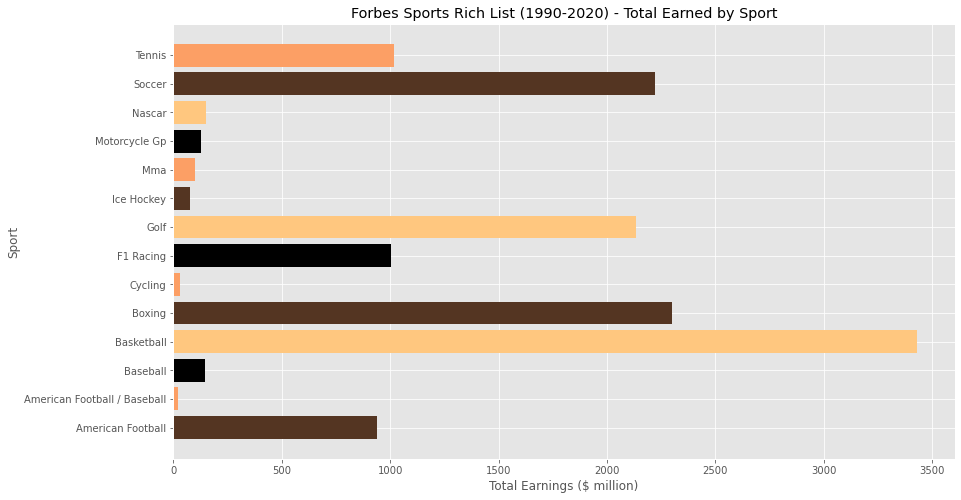

In [19]:
# Plot Forbes Rich List by Total Earnings
plt.barh(df_sport['Sport'], df_sport['Total Earnings ($ million)'], color=colors)

# Add labels
plt.title("Forbes Sports Rich List (1990-2020) - Total Earned by Sport")
plt.xlabel("Total Earnings ($ million)")
plt.ylabel("Sport")

plt.savefig('pyplot/pyplot-outputs/ForbesRichSportTotalBar.png')

We can also include more than one plot in a figure. The below example includes 4 plots created using the Forbes dataset. This can be done by calling the plt.subplots module, assigning a different ax to each plot, and where we previously would call, for example, plt.scatter, we now call ax1.scatter to assign the scatterplot to the top left panel. 

Some changes have to be made to the code to make it compatible with subplots. One difference is we can now set a title for all the plots at once using suptitle, while we can still set a title for the subplots using set_title. 'set_' also has to be placed before a number of the previous commands, such as with 'set_xlabel', as we are now applying a more object oriented approach to be able to control the output for the various figures, with 'set_xlabel' a method of matplotlib.axes. As such, some methods have to be changed completely, such as with the code to rotate the labels of the vertical barplot.

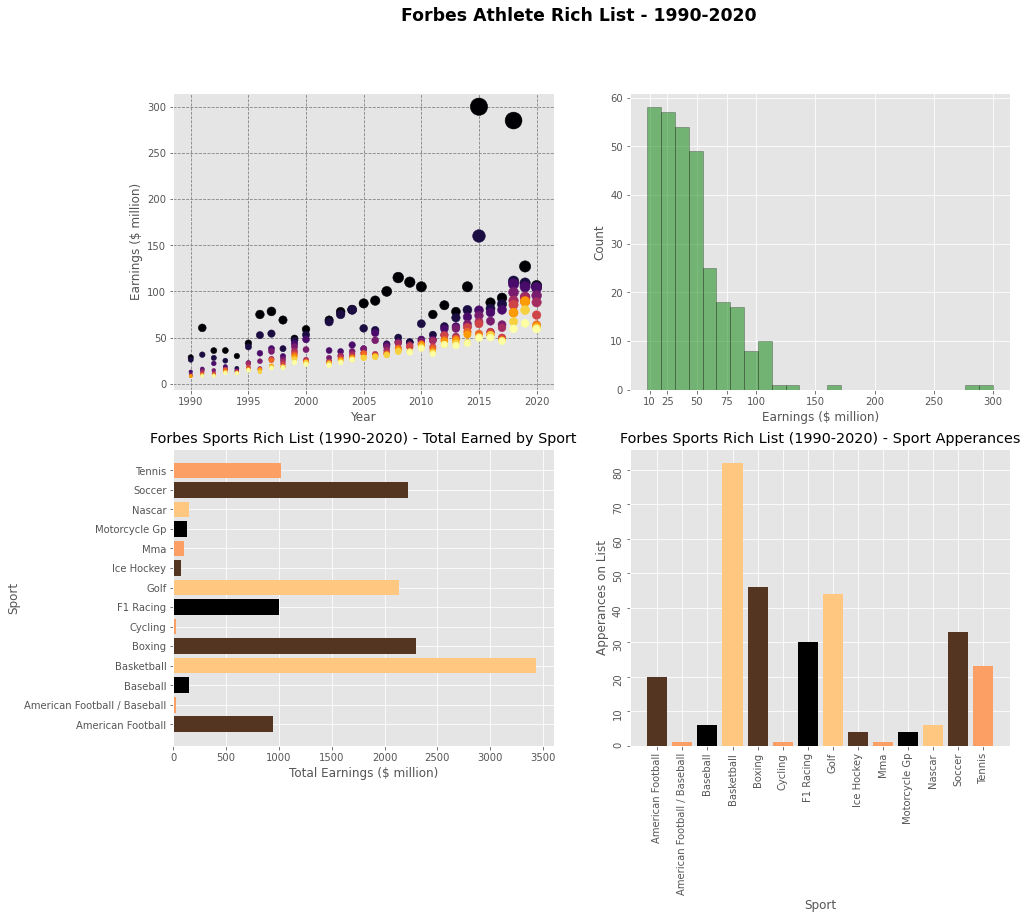

In [20]:
# Create a 2x2 subplot of the Forbes dataset plots
# Code adapted from the following sources:
# https://stackoverflow.com/questions/16610996/how-can-i-have-each-plot-in-matplotlibs-subplots-use-a-different-axes
# https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib
# https://stackoverflow.com/questions/31186019/rotate-tick-labels-in-subplot-pyplot-matplotlib-gridspec/52461208

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(15,12))

f.suptitle("Forbes Athlete Rich List - 1990-2020", fontsize='xx-large', fontweight='bold')

# Recreaate scatterplot in the top left panel
ax1.scatter(x=df["Year"], y=df["earnings ($ million)"], 
            s=df["earnings ($ million)"],c=df["Current Rank"], marker='o', 
           cmap = 'inferno')
ax1.set_xlabel("Year")
ax1.set_ylabel("Earnings ($ million)")
ax1.grid(True, color='gray', linestyle = "--")

# Recreate histogram in the top right panel
ax2.hist(df["earnings ($ million)"], bins = 25, color='g', 
         alpha=0.5, edgecolor='black')
ax2.set_xlabel("Earnings ($ million)")
ax2.set_ylabel("Count")
# Giving the plot unique ticks on the x-axis so there are more markers where the plot has more datapoints
x_ticks = [10, 25, 50, 75, 100, 150, 200, 250, 300]
#add x-axis values to plot
ax2.set_xticks(ticks=x_ticks)

# Recreate horizontal barplot in the bottom right panel 
ax3.barh(df_sport['Sport'], df_sport['Total Earnings ($ million)'], color=colors)
ax3.set_title("Forbes Sports Rich List (1990-2020) - Total Earned by Sport")
ax3.set_xlabel("Total Earnings ($ million)")
ax3.set_ylabel("Sport")

# Recreate vertical barplot in the bottom left panel
data_color = [200.,600.,0.,750.]
data_color_normalized = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('copper')
colors = my_cmap(data_color_normalized)
ax4.bar(df_sport['Sport'], df_sport['Count'], color=colors)
ax4.set_title("Forbes Sports Rich List (1990-2020) - Sport Apperances")
ax4.set_xlabel("Sport")
ax4.set_ylabel("Apperances on List")
ax4.tick_params(labelrotation=90)

plt.savefig('pyplot/pyplot-outputs/ForbesAllPlots.png')

# References<a id='h6'></a>

**1**.<a id='f1'></a> Hunter, J.D., 2007. Matplotlib: A 2D graphics environment. Computing In Science Engineering 9, 3. 90-95. https://zenodo.org/record/3898017#.YIhV_6Eo9PY [Accessed 02 January 2022].[↩](#a1)    
**2**.<a id='f2'></a> Hunter, J. D., 2008. History. [online] Available at: <https://matplotlib.org/3.3.3/users/history.html> [Accessed 02 January 2022].[↩](#a2)    
**3**.<a id='f3'></a> VanderPlas, J., 2016. * Python Data Science Handbook: Essential Tools for Working with Data.* " O'Reilly Media, Inc."., p. 217.[↩](#a3)     
**4**.<a id='f4'></a> Matplotlib, 2022. Anatomy of a figure. [online]. Available at: <https://matplotlib.org/stable/gallery/showcase/anatomy.html> [Accessed 02 January 2022].[↩](#a4)     
**5**.<a id='f5'></a> Matplotlib, 2022. API Reference. [online] Available at: <https://matplotlib.org/stable/api/index.html> [Accessed 02 January 2022].[↩](#a5)      
**6**.<a id='f6'></a> Solomon, B., 2018. Python Plotting With Matplotlib (Guide) - Stateful Versus Stateless Approaches. [online]. Available at: < https://realpython.com/python-matplotlib-guide/#stateful-versus-stateless-approaches>[Accessed 02 January 2022].[↩](#a6)      
**7**.<a id='f7'></a> Pandey, P, 2021. Forbes Highest Paid Athletes 1990-2020. [online]. Available at: <https://www.kaggle.com/parulpandey/forbes-highest-paid-athletes-19902019> [Accessed 02 January 2022]. [↩](#a7)     
**8**.<a id='f8'></a> Matplotlib, 2022. matplotlib.pyplot.scatter. [online]. Available at: <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html> [Accessed 02 January 2022]. [↩](#a8)     
**9**.<a id='f9'></a> Yale, 2021. Scatterplot. [online] Available at: <http://www.stat.yale.edu/Courses/1997-98/101/scatter.htm> [Accessed 02 January 2022].[↩](#a9)   
**10**.<a id='f10'></a> Syu, T., 2022. Matplotlib Style Gallery. [online]. Available at: <https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html> [Accessed 02 January 2022].[↩](#a10)     
**11**.<a id='f11'></a> Matplotlib, 2022. matplotlib.pyplot.hist. [online]. Available at: <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html> [Accessed 02 January 2022].[↩](#a11)    
**12**.<a id='f12'></a> Matplotlib, 2022. matplotlib.pyplot.bar. [online] Available at: <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html> [Accessed 02 January 2022].[↩](#a12)     
**13**.<a id='f13'></a> Johnson, D., 2021. Histogram vs Bar Graph: Must Know Differences. [online]. Available at: https://www.guru99.com/histogram-vs-bar-chart.html [Accessed 02 January 2022]. [↩](#a13)      
